In [7]:
import os
print(os.getcwd())

C:\Users\Light


In [8]:
os.chdir("C:/Users/Light/OneDrive/Documents")

In [39]:
med_events = pd.read_csv('C:/Users/Light/OneDrive/Documents/med.events.csv')

In [41]:
tidy = ExamplePats.rename(columns={
    "Patient_ID": "pnr",
    "DATE": "eksd",  
    "dosage_per_day": "perday",
    "category": "ATC",
    "Duration": "dur_original"
}, errors="ignore")  

print(tidy.columns)  


Index(['PATIENT_ID', 'eksd', 'PERDAY', 'CATEGORY', 'DURATION'], dtype='object')


In [42]:
tidy["eksd"] = pd.to_datetime(tidy["eksd"], errors="coerce")


In [47]:
med_events.columns = med_events.columns.str.strip()

tidy = med_events.copy().rename(columns={
    "Patient_ID": "pnr",
    "DATE": "eksd",
    "dosage_per_day": "perday",
    "category": "ATC",
    "Duration": "dur_original"
}, errors="ignore")

if "eksd" in tidy.columns:
    tidy["eksd"] = pd.to_datetime(tidy["eksd"], errors="coerce")
else:
    raise KeyError("Column 'eksd' (formerly 'DATE') is missing in the dataset.")

print(tidy.head()) 


   PATIENT_ID       eksd  PERDAY CATEGORY  DURATION
0           1 2033-04-26       4     medA        50
1           1 2033-07-04       4     medB        30
2           1 2033-08-03       4     medB        30
3           1 2033-08-17       4     medB        30
4           1 2033-10-13       4     medB        30


In [54]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

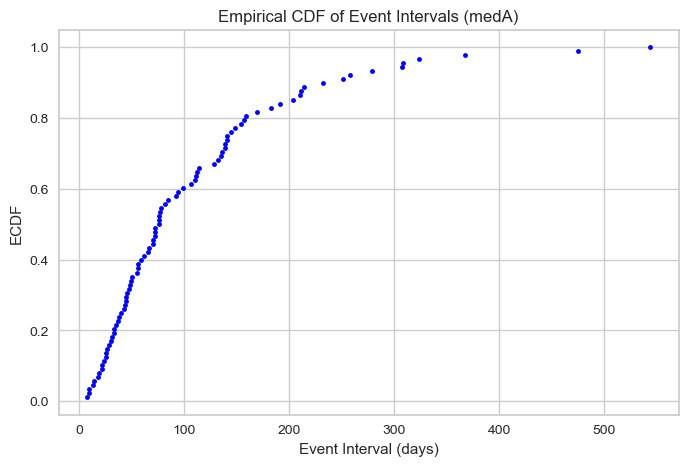

C:\Users\Light\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


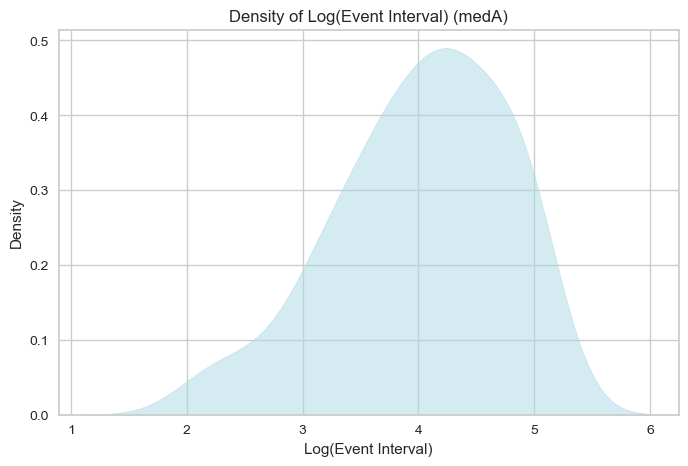

C:\Users\Light\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Light\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Light\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Light\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

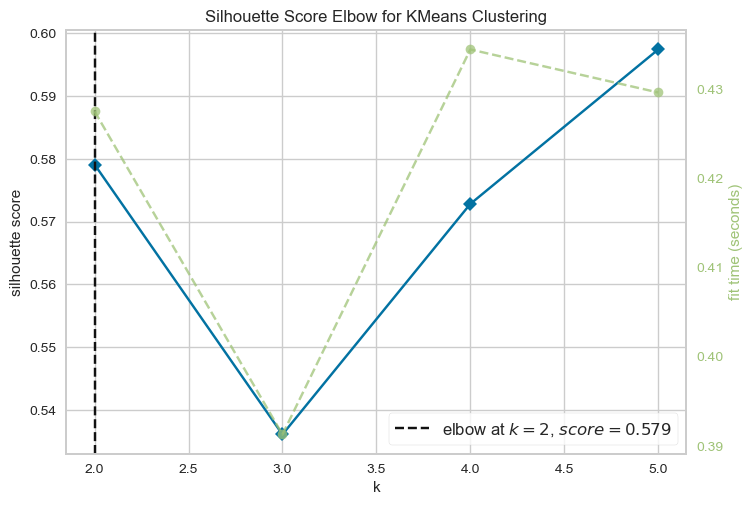

C:\Users\Light\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


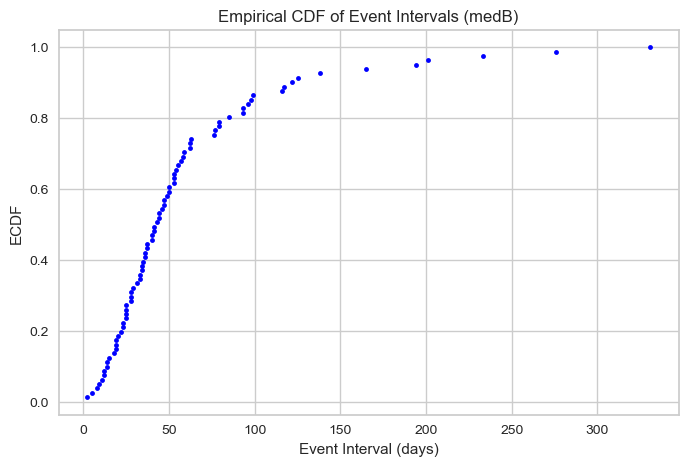

C:\Users\Light\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


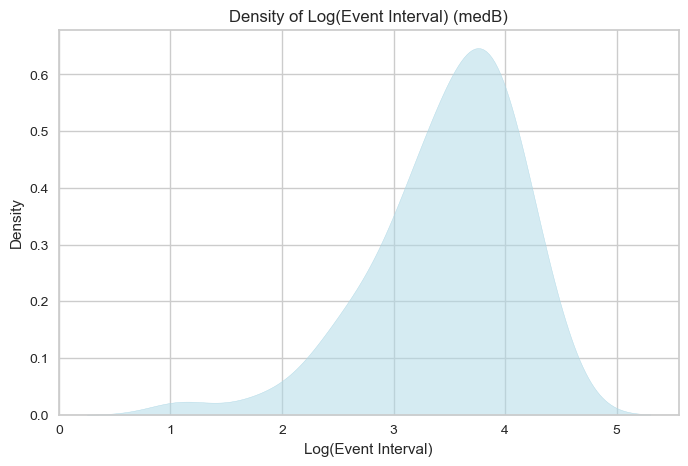

C:\Users\Light\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Light\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Light\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Light\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

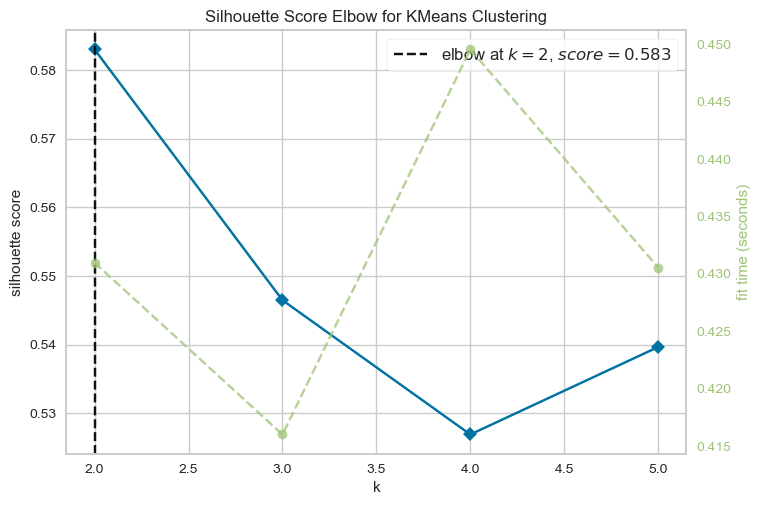

C:\Users\Light\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Merged Data (medA):
   pnr       eksd  perday   ATC  dur_original  median  Cluster
0    2 2036-01-20       4  medA            50    31.0        0
1    2 2036-03-10       4  medA            50    31.0        0
2    2 2036-08-01       4  medA            50    31.0        0
3    2 2036-08-01       4  medB            60    31.0        0
4    2 2036-09-21       4  medB            60    31.0        0

Median of Medians (medA):
   pnr  Duration
0    2      51.0
1    6      66.5
2    7      66.0
3    8      36.0
4    9      80.0


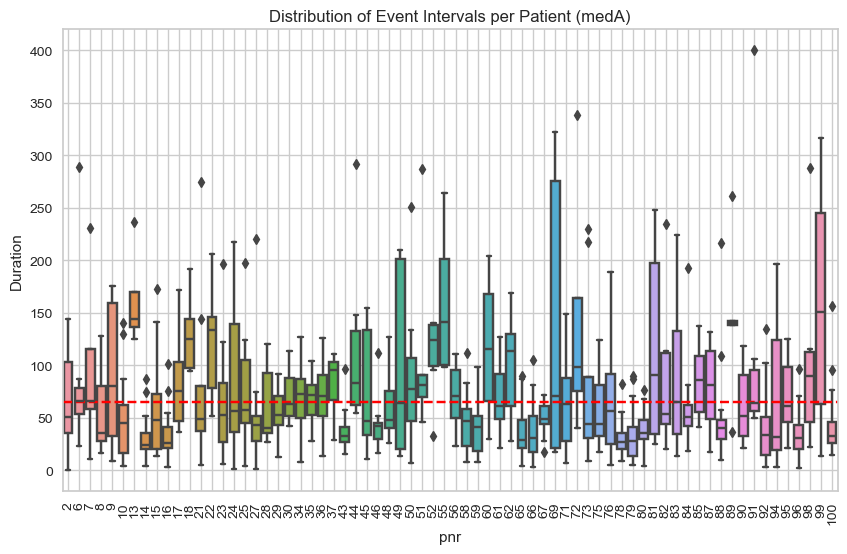


Merged Data (medB):
   pnr       eksd  perday   ATC  dur_original  median  Cluster
0    1 2033-04-26       4  medA            50    46.0        1
1    1 2033-07-04       4  medB            30    46.0        1
2    1 2033-08-03       4  medB            30    46.0        1
3    1 2033-08-17       4  medB            30    46.0        1
4    1 2033-10-13       4  medB            30    46.0        1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from lifelines import KaplanMeierFitter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from datetime import datetime

# Ensure med_events is correctly assigned
try:
    med_events
except NameError:
    raise ValueError("Error: med_events dataset is missing. Load the dataset before running the script.")

# Load dataset
ExamplePats = med_events.copy()

# Rename columns for clarity
tidy = ExamplePats.rename(columns={"PATIENT_ID": "pnr", "DATE": "eksd", "PERDAY": "perday", "CATEGORY": "ATC", "DURATION": "dur_original"})

# Convert date format
tidy["eksd"] = pd.to_datetime(tidy["eksd"], errors='coerce')  # 'coerce' avoids errors if invalid dates exist

def See(arg1):
    # Filter dataset by medication type
    C09CA01 = tidy[tidy["ATC"] == arg1].copy()
    
    # Calculate event intervals
    C09CA01 = C09CA01.sort_values(by=["pnr", "eksd"])
    C09CA01["prev_eksd"] = C09CA01.groupby("pnr")["eksd"].shift(1)
    
    # Remove NaN values from prev_eksd
    Drug_see_p1 = C09CA01.dropna(subset=["prev_eksd"]).copy()
    
    # Select one random event per patient
    np.random.seed(1234)
    Drug_see_p1 = Drug_see_p1.groupby("pnr").sample(n=1, random_state=1234).copy()
    
    # Calculate event intervals
    Drug_see_p1["event_interval"] = (Drug_see_p1["eksd"] - Drug_see_p1["prev_eksd"]).dt.days
    
    # Handle invalid values before transformation
    Drug_see_p1["event_interval"].replace([np.inf, -np.inf], np.nan, inplace=True)
    Drug_see_p1.dropna(subset=["event_interval"], inplace=True)

    # Remove non-positive values before log transformation
    Drug_see_p1 = Drug_see_p1[Drug_see_p1["event_interval"] > 0].copy()

    # Generate ECDF plot
    x = np.sort(Drug_see_p1["event_interval"])
    y = np.arange(1, len(x) + 1) / len(x)
    
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, marker=".", linestyle="none", color="blue")
    plt.title(f"Empirical CDF of Event Intervals ({arg1})")
    plt.xlabel("Event Interval (days)")
    plt.ylabel("ECDF")
    plt.grid(True)
    plt.show()
    
    # Filter data to 80th percentile
    threshold = np.nanquantile(Drug_see_p1["event_interval"], 0.8)
    Drug_see_p2 = Drug_see_p1[Drug_see_p1["event_interval"] <= threshold].copy()
    
    # Ensure no NaN or infinite values for KDE plot
    Drug_see_p2 = Drug_see_p2[np.isfinite(Drug_see_p2["event_interval"])]

    # Plot log-transformed event intervals density
    plt.figure(figsize=(8, 5))
    sns.kdeplot(np.log1p(Drug_see_p2["event_interval"]), fill=True, color="lightblue", alpha=0.5)
    plt.title(f"Density of Log(Event Interval) ({arg1})")
    plt.xlabel("Log(Event Interval)")
    plt.grid(True)
    plt.show()
    
    # Determine optimal clusters using KMeans and the elbow method
    scaler = StandardScaler()
    clustering_data = scaler.fit_transform(np.log1p(Drug_see_p2[["event_interval"]]))  # log1p to avoid log(0) errors
    
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2, 6), metric="silhouette")
    visualizer.fit(clustering_data)
    visualizer.show()
    
    optimal_clusters = visualizer.elbow_value_
    kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=1234).fit(clustering_data)
    Drug_see_p2["Cluster"] = kmeans.labels_
    
    # Compute min, max, and median per cluster
    nif = Drug_see_p2.groupby("Cluster")["event_interval"].agg(["min", "max", "median"]).reset_index()
    
    # Merge cluster info with original dataset
    results = Drug_see_p1.merge(nif, how="cross")
    results["Final_cluster"] = np.where(
        (results["event_interval"] >= results["min"]) & (results["event_interval"] <= results["max"]),
        results["Cluster"], np.nan
    )
    
    results = results.dropna(subset=["Final_cluster"])[["pnr", "median", "Cluster"]]
    
    return results

# Function to check assumption about event intervals
def see_assumption(data, label):
    # Merge with the original dataset to get the missing 'eksd' column
    merged_data = tidy.merge(data, on="pnr", how="inner")

    # Debugging: Print first few rows
    print(f"\nMerged Data ({label}):")
    print(merged_data.head())

    # Sort by patient and date
    merged_data = merged_data.sort_values(by=["pnr", "eksd"])

    # Compute event intervals
    merged_data["prev_eksd"] = merged_data.groupby("pnr")["eksd"].shift(1)
    merged_data = merged_data.dropna(subset=["prev_eksd"]).copy()
    merged_data["Duration"] = (merged_data["eksd"] - merged_data["prev_eksd"]).dt.days

    # Boxplot of event intervals
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=merged_data["pnr"].astype(str), y=merged_data["Duration"])
    plt.xticks(rotation=90)
    plt.title(f"Distribution of Event Intervals per Patient ({label})")
    plt.grid(True)

    # Calculate median of medians
    medians_of_medians = merged_data.groupby("pnr")["Duration"].median().reset_index()

    # Debugging: Print median of medians
    print(f"\nMedian of Medians ({label}):")
    print(medians_of_medians.head())

    plt.axhline(y=medians_of_medians["Duration"].mean(), linestyle="dashed", color="red")
    plt.show()


medA = See("medA")
medB = See("medB")

see_assumption(medA, "medA")
see_assumption(medB, "medB")
